In [59]:
import os
import sys
import pandas as pd

In [60]:
os.getcwd()

'd:\\Code_ML\\smart_grid_forecasting\\notebooks'

In [61]:
df = pd.read_csv('../data/raw/smart_grid_dataset.csv')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Timestamp                    50000 non-null  object 
 1   Voltage (V)                  50000 non-null  float64
 2   Current (A)                  50000 non-null  float64
 3   Power Consumption (kW)       50000 non-null  float64
 4   Reactive Power (kVAR)        50000 non-null  float64
 5   Power Factor                 50000 non-null  float64
 6   Solar Power (kW)             50000 non-null  float64
 7   Wind Power (kW)              50000 non-null  float64
 8   Grid Supply (kW)             50000 non-null  float64
 9   Voltage Fluctuation (%)      50000 non-null  float64
 10  Overload Condition           50000 non-null  int64  
 11  Transformer Fault            50000 non-null  int64  
 12  Temperature (°C)             50000 non-null  float64
 13  Humidity (%)    

In [66]:
df.columns

Index(['Timestamp', 'Voltage (V)', 'Current (A)', 'Power Consumption (kW)',
       'Reactive Power (kVAR)', 'Power Factor', 'Solar Power (kW)',
       'Wind Power (kW)', 'Grid Supply (kW)', 'Voltage Fluctuation (%)',
       'Overload Condition', 'Transformer Fault', 'Temperature (°C)',
       'Humidity (%)', 'Electricity Price (USD/kWh)', 'Predicted Load (kW)'],
      dtype='object')

In [67]:
df['time'] = pd.to_datetime(df['Timestamp'])

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Timestamp                    50000 non-null  object        
 1   Voltage (V)                  50000 non-null  float64       
 2   Current (A)                  50000 non-null  float64       
 3   Power Consumption (kW)       50000 non-null  float64       
 4   Reactive Power (kVAR)        50000 non-null  float64       
 5   Power Factor                 50000 non-null  float64       
 6   Solar Power (kW)             50000 non-null  float64       
 7   Wind Power (kW)              50000 non-null  float64       
 8   Grid Supply (kW)             50000 non-null  float64       
 9   Voltage Fluctuation (%)      50000 non-null  float64       
 10  Overload Condition           50000 non-null  int64         
 11  Transformer Fault            50000 non-nu

In [69]:
df = df.sort_values('time')

In [70]:
df.head()

,Timestamp,Voltage (V),Current (A),Power Consumption (kW),Reactive Power (kVAR),Power Factor,Solar Power (kW),Wind Power (kW),Grid Supply (kW),Voltage Fluctuation (%),Overload Condition,Transformer Fault,Temperature (°C),Humidity (%),Electricity Price (USD/kWh),Predicted Load (kW),time
0,2024-01-01 00:00:00,232.483571,5.124673,1.191402,0.399029,0.907766,46.614845,26.399566,0.0,1.055937,0,0,17.842767,64.523353,0.416156,1.233158,2024-01-01 00:00:00
1,2024-01-01 00:15:00,229.308678,22.213519,5.093753,1.248030,0.831813,6.907170,18.555011,0.0,-3.910902,1,0,18.753698,49.671940,0.492334,5.247824,2024-01-01 00:15:00
2,2024-01-01 00:30:00,233.238443,46.132217,10.759806,2.790464,0.999005,15.477640,12.905025,0.0,-0.197551,0,0,16.719325,48.472769,0.427785,10.580278,2024-01-01 00:30:00
3,2024-01-01 00:45:00,237.615149,47.648972,11.322118,1.956965,0.896462,35.746398,28.937129,0.0,2.671921,0,0,15.364564,75.766776,0.487953,11.225946,2024-01-01 00:45:00
4,2024-01-01 01:00:00,228.829233,7.410166,1.695663,0.624718,0.870681,27.555038,14.184648,0.0,3.826937,0,0,38.760333,61.384213,0.290078,1.696639,2024-01-01 01:00:00


In [71]:
df.set_index('time')

,Timestamp,Voltage (V),Current (A),Power Consumption (kW),Reactive Power (kVAR),Power Factor,Solar Power (kW),Wind Power (kW),Grid Supply (kW),Voltage Fluctuation (%),Overload Condition,Transformer Fault,Temperature (°C),Humidity (%),Electricity Price (USD/kWh),Predicted Load (kW)
time,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,2024-01-01 00:00:00,232.483571,5.124673,1.191402,0.399029,0.907766,46.614845,26.399566,0.000000,1.055937,0,0,17.842767,64.523353,0.416156,1.233158
2024-01-01 00:15:00,2024-01-01 00:15:00,229.308678,22.213519,5.093753,1.248030,0.831813,6.907170,18.555011,0.000000,-3.910902,1,0,18.753698,49.671940,0.492334,5.247824
2024-01-01 00:30:00,2024-01-01 00:30:00,233.238443,46.132217,10.759806,2.790464,0.999005,15.477640,12.905025,0.000000,-0.197551,0,0,16.719325,48.472769,0.427785,10.580278
2024-01-01 00:45:00,2024-01-01 00:45:00,237.615149,47.648972,11.322118,1.956965,0.896462,35.746398,28.937129,0.000000,2.671921,0,0,15.364564,75.766776,0.487953,11.225946
2024-01-01 01:00:00,2024-01-01 01:00:00,228.829233,7.410166,1.695663,0.624718,0.870681,27.555038,14.184648,0.000000,3.826937,0,0,38.760333,61.384213,0.290078,1.696639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-04 18:45:00,2025-06-04 18:45:00,230.283995,34.885717,8.033622,1.412623,0.958675,3.846010,3.773607,0.414005,2.032808,0,0,17.569583,65.013656,0.445045,7.866108
2025-06-04 19:00:00,2025-06-04 19:00:00,229.875386,7.380088,1.696501,0.308268,0.907014,16.522504,10.832262,0.000000,-3.274382,0,0,31.907835,25.049143,0.342882,1.753542
2025-06-04 19:15:00,2025-06-04 19:15:00,232.500424,43.166952,10.036335,1.631748,0.913899,37.235774,12.475871,0.000000,1.810338,1,0,12.606985,62.469951,0.215314,9.947611


In [72]:
df.shape

(50000, 17)

In [73]:
df.isna().sum()

Timestamp                      0
Voltage (V)                    0
Current (A)                    0
Power Consumption (kW)         0
Reactive Power (kVAR)          0
Power Factor                   0
Solar Power (kW)               0
Wind Power (kW)                0
Grid Supply (kW)               0
Voltage Fluctuation (%)        0
Overload Condition             0
Transformer Fault              0
Temperature (°C)               0
Humidity (%)                   0
Electricity Price (USD/kWh)    0
Predicted Load (kW)            0
time                           0
dtype: int64

In [74]:
df.columns = (df.columns.str.strip().str.lower().str.replace(r"[()%/]", "", regex=True).str.replace(" ", "_"))

In [75]:
df.columns

Index(['timestamp', 'voltage_v', 'current_a', 'power_consumption_kw',
       'reactive_power_kvar', 'power_factor', 'solar_power_kw',
       'wind_power_kw', 'grid_supply_kw', 'voltage_fluctuation_',
       'overload_condition', 'transformer_fault', 'temperature_°c',
       'humidity_', 'electricity_price_usdkwh', 'predicted_load_kw', 'time'],
      dtype='object')

In [76]:
df["hour"] = df["time"].dt.hour
df["minute"] = df["time"].dt.minute
df["day"] = df["time"].dt.day
df["day_of_week"] = df["time"].dt.dayofweek
df["month"] = df["time"].dt.month


In [77]:
df.columns

Index(['timestamp', 'voltage_v', 'current_a', 'power_consumption_kw',
       'reactive_power_kvar', 'power_factor', 'solar_power_kw',
       'wind_power_kw', 'grid_supply_kw', 'voltage_fluctuation_',
       'overload_condition', 'transformer_fault', 'temperature_°c',
       'humidity_', 'electricity_price_usdkwh', 'predicted_load_kw', 'time',
       'hour', 'minute', 'day', 'day_of_week', 'month'],
      dtype='object')

In [78]:
df.tail()

,timestamp,voltage_v,current_a,power_consumption_kw,reactive_power_kvar,power_factor,solar_power_kw,wind_power_kw,grid_supply_kw,voltage_fluctuation_,...,temperature_°c,humidity_,electricity_price_usdkwh,predicted_load_kw,time,hour,minute,day,day_of_week,month
49995,2025-06-04 18:45:00,230.283995,34.885717,8.033622,1.412623,0.958675,3.846010,3.773607,0.414005,2.032808,...,17.569583,65.013656,0.445045,7.866108,2025-06-04 18:45:00,18,45,4,2,6
49996,2025-06-04 19:00:00,229.875386,7.380088,1.696501,0.308268,0.907014,16.522504,10.832262,0.000000,-3.274382,...,31.907835,25.049143,0.342882,1.753542,2025-06-04 19:00:00,19,0,4,2,6
49997,2025-06-04 19:15:00,232.500424,43.166952,10.036335,1.631748,0.913899,37.235774,12.475871,0.000000,1.810338,...,12.606985,62.469951,0.215314,9.947611,2025-06-04 19:15:00,19,15,4,2,6
49998,2025-06-04 19:30:00,231.326077,46.254150,10.699791,1.712672,0.948393,22.098785,1.512796,0.000000,1.500918,...,26.773676,58.100487,0.147162,10.886454,2025-06-04 19:30:00,19,30,4,2,6
49999,2025-06-04 19:45:00,237.579055,17.904864,4.253821,1.050729,0.939617,7.220105,24.808317,0.000000,-1.584342,...,15.083737,43.051294,0.360774,4.361657,2025-06-04 19:45:00,19,45,4,2,6


In [80]:
df.drop(columns=['timestamp'], inplace=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   voltage_v                 50000 non-null  float64       
 1   current_a                 50000 non-null  float64       
 2   power_consumption_kw      50000 non-null  float64       
 3   reactive_power_kvar       50000 non-null  float64       
 4   power_factor              50000 non-null  float64       
 5   solar_power_kw            50000 non-null  float64       
 6   wind_power_kw             50000 non-null  float64       
 7   grid_supply_kw            50000 non-null  float64       
 8   voltage_fluctuation_      50000 non-null  float64       
 9   overload_condition        50000 non-null  int64         
 10  transformer_fault         50000 non-null  int64         
 11  temperature_°c            50000 non-null  float64       
 12  humidity_         

In [82]:
df.set_index('time')

,voltage_v,current_a,power_consumption_kw,reactive_power_kvar,power_factor,solar_power_kw,wind_power_kw,grid_supply_kw,voltage_fluctuation_,overload_condition,transformer_fault,temperature_°c,humidity_,electricity_price_usdkwh,predicted_load_kw,hour,minute,day,day_of_week,month
time,,,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,232.483571,5.124673,1.191402,0.399029,0.907766,46.614845,26.399566,0.000000,1.055937,0,0,17.842767,64.523353,0.416156,1.233158,0,0,1,0,1
2024-01-01 00:15:00,229.308678,22.213519,5.093753,1.248030,0.831813,6.907170,18.555011,0.000000,-3.910902,1,0,18.753698,49.671940,0.492334,5.247824,0,15,1,0,1
2024-01-01 00:30:00,233.238443,46.132217,10.759806,2.790464,0.999005,15.477640,12.905025,0.000000,-0.197551,0,0,16.719325,48.472769,0.427785,10.580278,0,30,1,0,1
2024-01-01 00:45:00,237.615149,47.648972,11.322118,1.956965,0.896462,35.746398,28.937129,0.000000,2.671921,0,0,15.364564,75.766776,0.487953,11.225946,0,45,1,0,1
2024-01-01 01:00:00,228.829233,7.410166,1.695663,0.624718,0.870681,27.555038,14.184648,0.000000,3.826937,0,0,38.760333,61.384213,0.290078,1.696639,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-06-04 18:45:00,230.283995,34.885717,8.033622,1.412623,0.958675,3.846010,3.773607,0.414005,2.032808,0,0,17.569583,65.013656,0.445045,7.866108,18,45,4,2,6
2025-06-04 19:00:00,229.875386,7.380088,1.696501,0.308268,0.907014,16.522504,10.832262,0.000000,-3.274382,0,0,31.907835,25.049143,0.342882,1.753542,19,0,4,2,6
2025-06-04 19:15:00,232.500424,43.166952,10.036335,1.631748,0.913899,37.235774,12.475871,0.000000,1.810338,1,0,12.606985,62.469951,0.215314,9.947611,19,15,4,2,6


### Consumption vs Supply Sources

In [83]:
import matplotlib.pyplot as plt

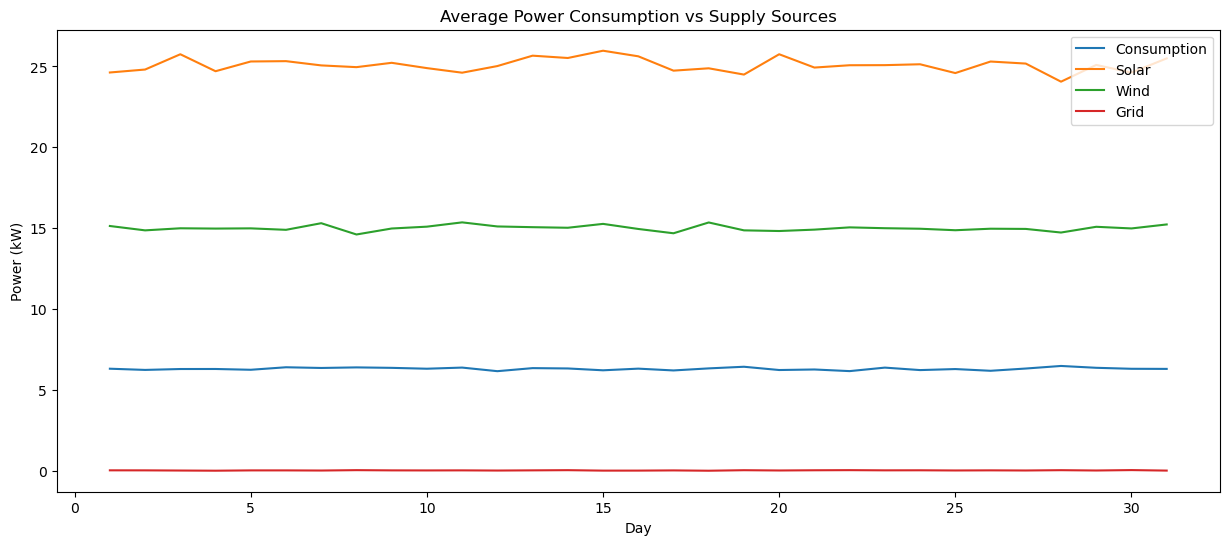

In [121]:
# Aggregate by day
daily_avg = df.groupby("day")[[
    "power_consumption_kw",
    "solar_power_kw",
    "wind_power_kw",
    "grid_supply_kw"
]].mean()

fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(daily_avg.index, daily_avg["power_consumption_kw"], label="Consumption")
ax.plot(daily_avg.index, daily_avg["solar_power_kw"], label="Solar")
ax.plot(daily_avg.index, daily_avg["wind_power_kw"], label="Wind")
ax.plot(daily_avg.index, daily_avg["grid_supply_kw"], label="Grid")

ax.set_title("Average Power Consumption vs Supply Sources")
ax.set_xlabel("Day")
ax.set_ylabel("Power (kW)")
ax.legend()

plt.show()


### Voltage & Power Quality Monitoring

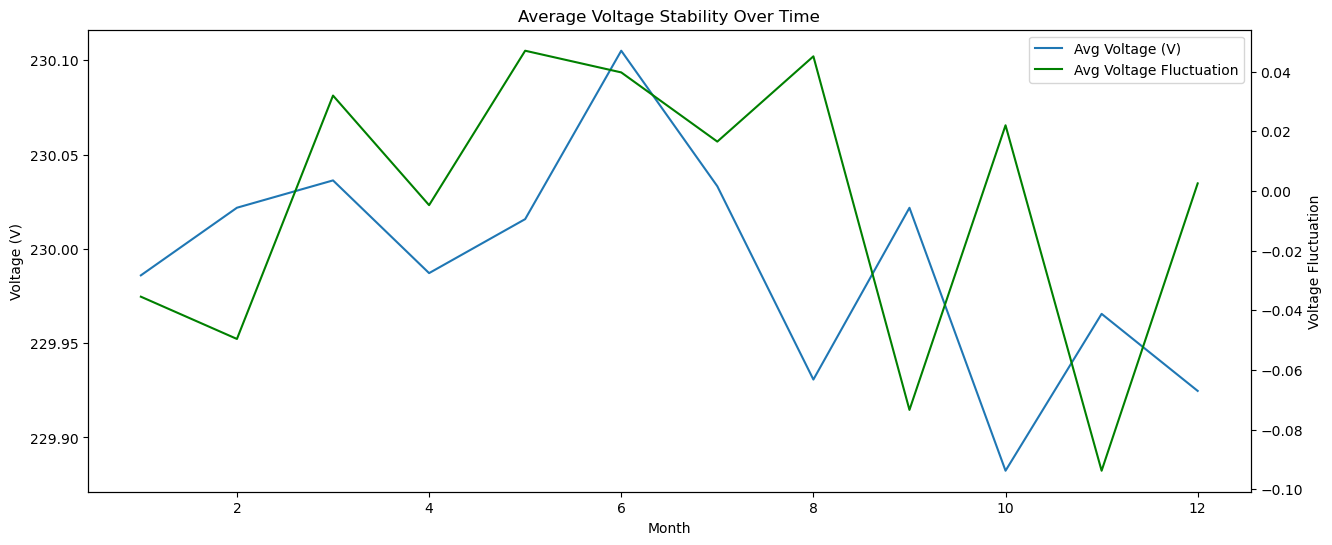

In [120]:
monthly_avg = df.groupby("month")[["voltage_v", "voltage_fluctuation_"]].mean()

fig, ax1 = plt.subplots(figsize=(15, 6))

# Left axis: Voltage
ax1.plot(monthly_avg.index, monthly_avg["voltage_v"], label="Avg Voltage (V)")
ax1.set_xlabel("Month")
ax1.set_ylabel("Voltage (V)")

# Right axis: Fluctuation
ax2 = ax1.twinx()
ax2.plot(monthly_avg.index, monthly_avg["voltage_fluctuation_"], label="Avg Voltage Fluctuation" , color='green')
ax2.set_ylabel("Voltage Fluctuation")

ax1.set_title("Average Voltage Stability Over Time")

# Combined legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="best")

plt.show()


### Price vs Demand Relationship

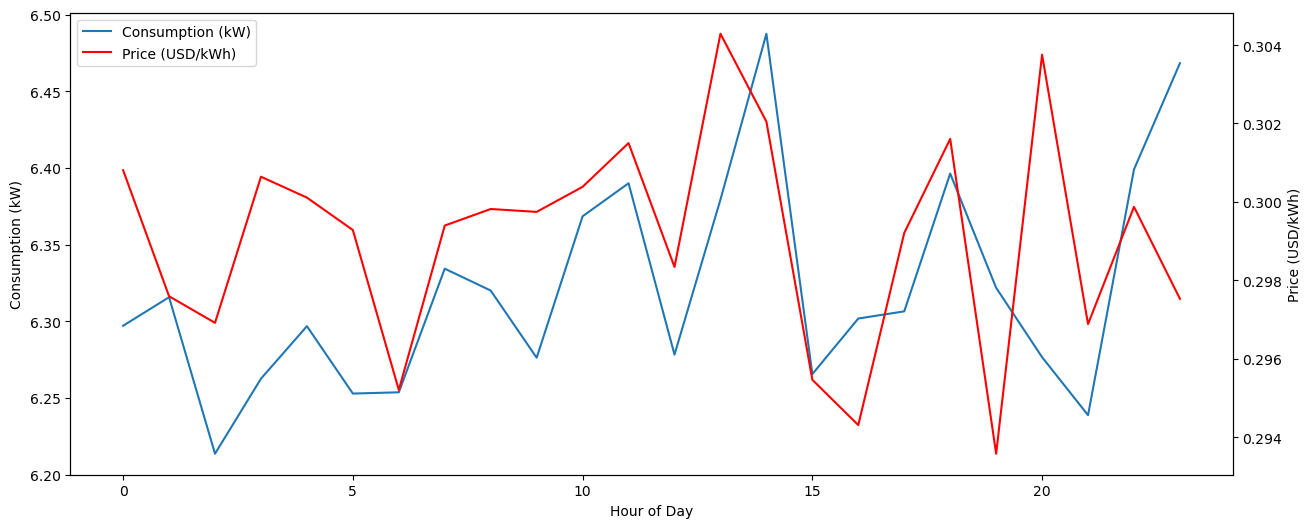

In [117]:
fig, ax1 = plt.subplots(figsize=(15, 6))

# Left axis: Consumption
hourly_avg = df.groupby('hour')['power_consumption_kw'].mean()
ax1.plot(hourly_avg.index, hourly_avg.values, label='Consumption (kW)')
ax1.set_xlabel("Hour of Day")
ax1.set_ylabel("Consumption (kW)")

# Right axis: Price
ax2 = ax1.twinx()
hourly_price = df.groupby('hour')['electricity_price_usdkwh'].mean()
ax2.plot(hourly_price.index, hourly_price.values, label='Price (USD/kWh)', color = 'red')
ax2.set_ylabel("Price (USD/kWh)")

# Legend (combined)
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='best')

plt.show()